[View in Colaboratory](https://colab.research.google.com/github/MarlonCajamarca/Deep-Learning-playground/blob/master/Adaline.ipynb)

# Adaptive Linear Neuron-Adaline Learning algorithm in Python


---
This notebook implements de adaline learning algorithm. We will create an interface for the Adaline algorithm using python 3.6 and newer versions. The key difference between preceptron and adaline algorithm is the weight updating and the introduccion of a continuous and differentiable loss function for weight updating
.






![Adaline vs Perceptron](https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png)

## Key facts of Adaline Learning Algorithm
- Weights are updated based on a linear activation function rather than an step function like in perceptron.
- Denoting $\phi (z) = \phi (w^T x)$ as the activation function used on adaline, this algorithm uses an identity function as activation function:
> $\phi (w^T x) = w^T x$
- Although weights are updated using linear activation function, predictions will be made using a threshold function (step function).
- Adaline compares true class labels to the continuous valued predicted class from the linear activation function, computes error based in that difference and updates the parameters using that error. 

## Gradient Descent for Minimizing Cost Functions


---

-Objective function needs to be Optimized.  Typically, objective function is a cost function $J$ that we want to minimize (minimizing our errors). We will later define $J$ to learn the weights by minimizing $J$.
- In Adaline, cost function $J$ = **Sum of Square Errors(SSE)**
> $J(w) = 1/2 \sum_{i=1}^n (y^i - \phi(z^i))^2$ 
- Then we will minimize $J (w)$ in order to find the best weights $w$ for the task in hand. 
- **SSE** is a continuous linear activation function. Therefore, it is differentiable! :)
- **SSE ** in addition is a convex function. (They have miximums and minimums we can use **Gradient Descent**, a powerfull optimization algorithm to drive the search for those weights.
- We will use the gradient of the cost function $\nabla J(w)$ to update our weights:

>> $w:= w + \Delta w$

>> $\Delta w = -\eta \nabla J(w)$

- We will need $\nabla J(w)$ which tell use how to adjust each weight $w_j$ based in the value of our cost function $J$. So, we can compute the entire gradient tensor $\nabla J(w) = \frac{\partial J}{\partial w_j}$  to drive the optimization process (the training/updating of the model weights).

>> $\nabla J(w) = \frac{\partial J}{\partial w_j}$

>> $\frac{\partial J}{\partial w_j } = - \sum_{i=1}^n (y^i - \phi(z^i)) x_j$

- So we can rewrite the update rule for the Adaline as:

>> $\Delta w_j = -\eta  \frac{\partial J}{\partial w_j }$
$\Delta w_j = \eta \sum_{i=1}^n (y^i - \phi(z^i)) x_j $

- Note that this update rule uses all the training examples for compute a single updating step (**batch gradient descent**)
- Also $\phi(z^i)$ is now a real number and not an integer class label like in the perceptron. 


## Implementing Adaline in Python


---

The learning rate $\eta$ is crucial and needs some experimentation to find a good value for optimal convergence. We will be experimenting with 2 different values for $\eta$ ($\eta = 0.1$ and $\eta = 0.0001$) and plot their corresponding cost vs epochs graphs to asses Adaline's learning process. 

In [0]:
import numpy as np

In [0]:
class AdalineGD(object):
  """
  Parameters
  ----------
  eta: float
    Learning Rate
  n_iter: int
    Number of epochs or passes over the training dataset.
  random_state
    random number generator seed for weight initialization
  
  Atributes
  ---------
  w_ : Model weights - 1d array
  cost_ : Cost (SSE) per Epoch - list 
  """
  def __init__(self, eta=0.01, n_iter=50, random_state = 19):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def fit(self, X, y):
    """
    Fitting the training data X, y - Training process
    inputs = X , target outputs = y
    Weights w_ are randomly initialized and cost per epoch J is also 
    collected in costs_ as a list.
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01,
                          size=1 + X.shape[1])
    self.costs_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      # Updating weights
      self.w_[1:] += self.eta * X.T.dot(errors)
      # Updating bias term
      self.w_[0]  += self.eta * errors.sum()
      # SumSquareErrors cost function
      cost = (errors**2).sum() / 2.0
      self.costs_.append(cost)
    return self
    
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def activation(self, X):
    return X
    
  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## Adaline training experiments - Learning rate $\eta$ hyperparameter

- First we will get the data (Similar to perceptrons algorithm this case). We will use the same subset of the Iris Dataset and perform binary classification baesd in 2 features and 100 samples $X, y$.
- Now lets make some experiments and see the impacts of the so called hyperparameters of the model in the performance and convergence of the learning/fitting process.

In [0]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                header = None)

# Select only setosa and versicolor input samples (first 100 samples)
# Use pd.values to obtain Numpy arrays & df.iloc[] to slice the input Dataframe
X = df.iloc[:100, [0,2]].values

y = df.iloc[:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

In [0]:
import matplotlib.pyplot as plt

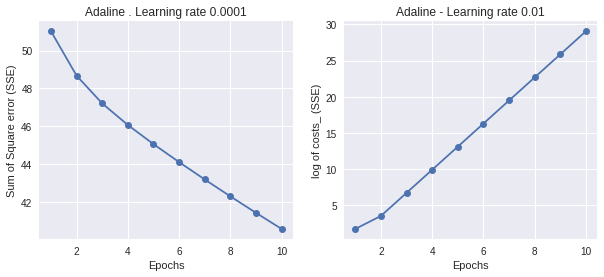

In [21]:
# Create the subplotings for 2 experiments (in a single row)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# experiment 1 - Learning rate 0.0001
ada_0 = AdalineGD(eta=0.0001, n_iter=10).fit(X, y)
ax[0].plot(range(1, len(ada_0.costs_) + 1),
           ada_0.costs_, marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Sum of Square error (SSE)")
ax[0].set_title("Adaline . Learning rate 0.0001")

# experiment 2 - Learning rate 0.01
ada_1 = AdalineGD(eta=0.01, n_iter=10).fit(X, y)
ax[1].plot(range(1, len(ada_1.costs_) + 1), 
           np.log10(ada_1.costs_), marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log of costs_ (SSE)")
ax[1].set_title("Adaline - Learning rate 0.01")

plt.show()

We must note that selecting an $\eta$ too large we can overshoot the global or local minimum, but an  $\eta$ too small spends a lot of time to converge. As in this image we can follow down the cost function until a global minimum or we can overshoot the global minimum and never converge to good parameters that achieve best performance:

![Learning rate role on convergence to global cost minimim](https://nthu-datalab.github.io/ml/labs/04-1_Perceptron_Adaline/fig-overshoot.png)

## Improving Gradient Descent through Feature Scaling - Standardization feature scaling method


---

- Feature scaling helps algorithms to achieve better performance .
- **Standardization** method is one of those feature scaling methods which helps gradient descent learning to converge more quickly. 
- **Standardization** gives our data the property of a standard normal distribution with zero mean and standart deviation of 1.
- **Standardization** substracts the sample mean $\mu_j$and divide by the variance $\sigma_j$ for each of the feature columns of $X$ 
> $x^´_j$ represents the entire jth column of X already normalized.

>> Therefore, we will normalize (or perform feature scaling) to aour input $X$ usign:

>> $x^´_j = \frac{x_j - \mu_j}{\sigma_j}$ 

- **Standardization** can easily be achieved using python *built-in funtions* Numpy.

In [0]:
# Create a copy of X without modifying the original matrix X
X_std = np.copy(X)
# Normalizing first column feature (sepal length feature)
X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X_std[:, 0].std()
# Normalizing second column feature (petal length feature)
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X_std[:, 1].std()

- First we will import the same `plot_decision_regions function` used in the perceptron algorithm example.

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
  # setup market generator and color map
  markers = ("s", "x", "o", "^", "v")
  colors  = ("red", "blue", "lightgreen", "grey", "cyan")
  cmap = ListedColormap(colors[: len(np.unique(y))])
  
  # Find min and max values from each feature
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  
  # Create a meshgrid using min and max values for each feature
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  
  # Make predictions using meshgrid points
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  
  # plot decision boundary
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  # Plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0],
                y = X[y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = cl,
                edgecolor = "black")

- Then, we will train a final Adaline algorithm using the normalized inputs $X_{std}$ and compare the results to our previous experiments:

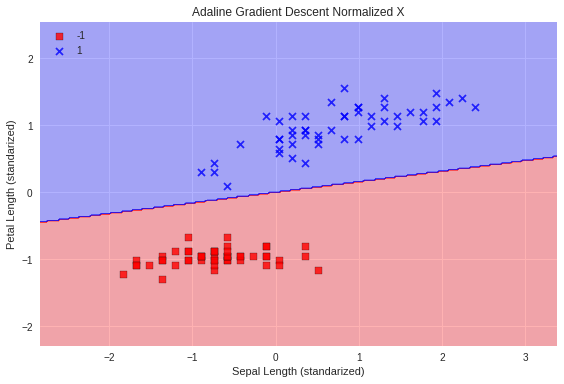

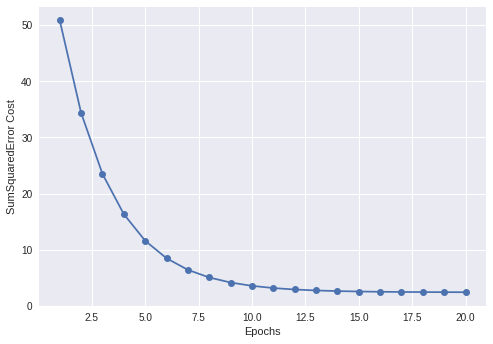

In [24]:
# Create and fit Adaline object using normalizing inputs and outputs
ada_std = AdalineGD(eta = 0.01, n_iter=20).fit(X_std, y)
# Plot the results
plot_decision_regions(X_std, y, classifier=ada_std)
plt.title("Adaline Gradient Descent Normalized X")
plt.xlabel("Sepal Length (standarized)")
plt.ylabel("Petal Length (standarized)")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()
# Plot the cost function for each epoch
plt.plot(range(1, len(ada_std.costs_)+1), ada_std.costs_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("SumSquaredError Cost")
plt.show()


- Adaline converged using $\eta = 0.01$ on the standarized inputs $X_{std}$. However, SumSquaredError remain non-zero eventhough all samples were classified correctly. 

## Stochastic Gradient Descent and Mini-batch Gradient Descent
Opose to **Batch gradient descent**, **stochastic gradient descent** makes steps toward the global minimum but considering each single example $(x_i, y_i)$ to make an entire weight update based in that single error computation.
> Therefore, the old update rule:

> $\Delta w = \eta \sum_{i} (y^i - \phi (z^i)) x^i$

>will become:

> $\Delta w = \eta (y^i - \phi (z^i)) x^i$

where the update $w = w + \Delta w$ is made using a single sample from $X$ dataset.

To obtain satisfying results with stochastic gradient descent, we need to present training data in a random order.

Also we will shuffle the training set $X$ for every Epoch to prevent cycles.

We can consider also to implement a **Adaptive Learning rate** instead of the fixed Learning rate $\eta$. 


## **Mini-batch Gradient Descent**

A mixture of Stochostic and Batch Gradien descent is **Mini-batch Gradient Descent**. Here we will use a batch of a couple of examples to make a weigth update. We will make `n_batch` weight updates for each Epoch wich often leads to faster convergence of the algorithm. 

Also we will use the vectorized operation over each batch and we will then avoid to loop over each train example as in stohcastic gradient descent.

## Adaline with Stochastic Gradient Descent


---

- `fit` method using SGD
- `partial_fit` method for online learning (keep learned weights)
-  Use random number generator seed to shuffle data before each epoch, as an option.

In [0]:
class AdalineSGD(object):
  """  Adaline Classifier.
  Parameters:
  -----------
  eta : float
    Learning rate (btw 0.0 and 1.0)
  n_iter : int
    Number of passes/epochs over training dataset
  random_state : int
    random number generator seed for random initialization 
    and shuffling
    
  Atributes:
  ----------
  w_ : 1d-array
    Weights of the model
  costs_ : list
    SSE cost function averaged over all training examples 
    for each epoch
  """
  def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=None):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    self.shuffle = shuffle
    # Creating a flag variable 
    self.w_initialized = False
  
  def fit(self, X, y):
    """
    Fitting the training data X, y - Training process
    inputs = X , target outputs = y
    Weights w_ are randomly initialized and cost per epoch J is also 
    collected in costs_ as a list.
    """
    self._initialize_weights(X.shape[1])
    self.costs_ = []
    
    for i in range(self.n_iter):
      if self.shuffle == True:
        X, y = self._shuffle(X, y)
      cost = []
      # Iterating over each training sample in X, y
      for x_i, y_i in zip(X, y):
        cost.append(self._update_weights(x_i, y_i))
      avg_cost = sum(cost) / len(cost)
      self.costs_.append(avg_cost)
    return self
  
  # For online learning schemes
  def partial_fit(self, X, y):
    """Fits training data avoiding weights reinitialization"""
    # If weights are not initialized then initialize them
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    # if we have more than 1 sample 
    if y.ravel().shape[0] > 1:
      for x_i, y_i in zip(X, y):
        self._update_weights(x_i, y_i)
    else:
      self._update_weights(X, y)
    return self
  
  def _update_weights(self, x_i, y_i):
    """ 
    Update weights based in each training sample.
    and return the cost of that sample
    """
    output = self.activation(self.net_input(x_i))
    error = y_i - output 
    # Update weights 
    self.w_[1:] += self.eta * error * x_i
    # Update bias
    self.w_[0]  += self.eta * error
    # SSE cost function
    cost = 0.5 * (error**2)
    return cost
  
  def _shuffle(self, X, y):
    """Shuffling training data"""
    r = self.rgen.permutation(len(y))
    return X[r], y[r]
  
  def _initialize_weights(self, num_feat):
    """Randomly initialize weights using normal distribution"""
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                               size=1 + num_feat)
    self.w_initialized = True
    
  def net_input(self, X):
    """Net input Z"""
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def activation(self, X):
    """Activation function phi(Z)"""
    return X
    
  def predict(self, X):
    """Predict binary classes (-1, 1) based on activation funciton values"""
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

Now we will experiment with Adaline learning algorithm using SGD and plot the results using `plot_decision_regions` and the `cost-per-epoch` graphs.

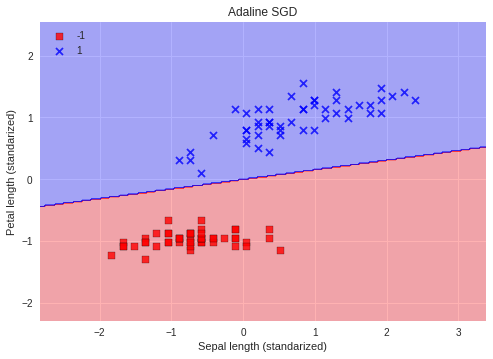

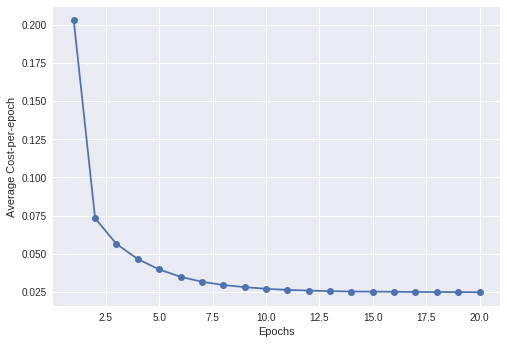

In [26]:
# A new Adaline SGD object
ada_SGD = AdalineSGD(eta=0.01, n_iter=20, random_state = 19).fit(X_std, y)

# Decision boundary plot
plot_decision_regions(X_std, y, classifier=ada_SGD)
plt.title("Adaline SGD")
plt.xlabel("Sepal length (standarized)")
plt.ylabel("Petal length (standarized)")
plt.legend(loc="upper left")
plt.show()

# Cost-per-epoch plot
plt.plot(range(1, len(ada_SGD.costs_)+1), ada_SGD.costs_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Average Cost-per-epoch")
plt.show()

Finally:
- We can see the average cost per epoch goes down pretty quickly and after 15 epoch ramains the same (Adaline SGD converged after approx 15 epochs)
- We could use the `partial_fit` method for online learning schemes where we have a continuous stream of data.




# End of Notebook